<a href="https://colab.research.google.com/github/ehpub/kfq_ML_2023/blob/main/2023_kfq_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의 교재 : https://wikibook.co.kr/pymlrev2/

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
data = iris.data
label = iris.target

In [3]:
from sklearn.mixture import GaussianMixture

In [7]:
model = KMeans(n_clusters=3)
model.fit(data)
pred = model.labels_
df = pd.DataFrame(data,columns=iris.feature_names)
df['label'] = label
df['kmeans'] = pred
df.groupby(['label'])['kmeans'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


label  kmeans
0      1         50
1      0         48
       2          2
2      2         36
       0         14
Name: kmeans, dtype: int64

label  gmm
0      0      50
1      2      45
       1       5
2      1      50
Name: gmm, dtype: int64


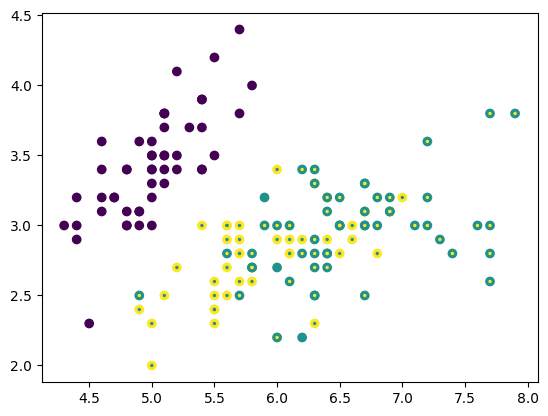

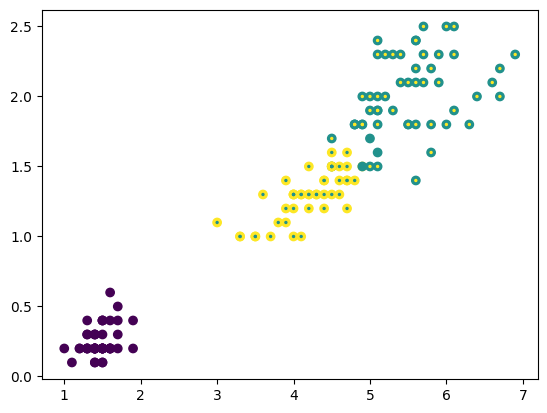

In [17]:
model = GaussianMixture(n_components=3)
model.fit(data)
pred = model.predict(data)
df = pd.DataFrame(data,columns=iris.feature_names)
df['label'] = label
df['gmm'] = pred
print(df.groupby(['label'])['gmm'].value_counts())
plt.scatter(data[:,0],data[:,1],c=pred)
plt.scatter(data[:,0],data[:,1],c=label,s=2)
plt.show()
plt.scatter(data[:,2],data[:,3],c=pred)
plt.scatter(data[:,2],data[:,3],c=label,s=2)
plt.show()

In [16]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,gmm
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561,0.360992
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658,0.128740
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035,0.352110
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547,0.422794
label,0.782561,-0.426658,0.949035,0.956547,1.000000,0.501675
gmm,0.360992,0.128740,0.352110,0.422794,0.501675,1.000000


In [20]:
from sklearn.datasets import make_blobs

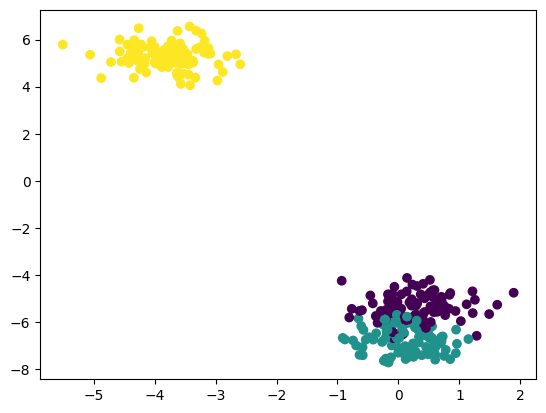

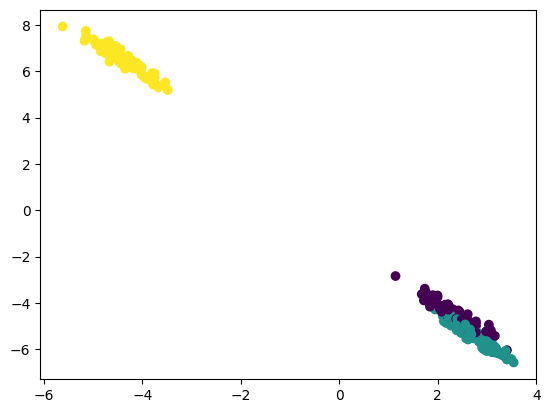

In [47]:
x,y = make_blobs(n_samples=300,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5
                 )
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
trans =[[0.6,-0.6],[-0.4,0.8]]
x_an = np.dot(x,trans)
plt.scatter(x_an[:,0],x_an[:,1],c=y)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


label  kmeans
0      2          84
       0          16
1      0          72
       2          28
2      1         100
Name: kmeans, dtype: int64


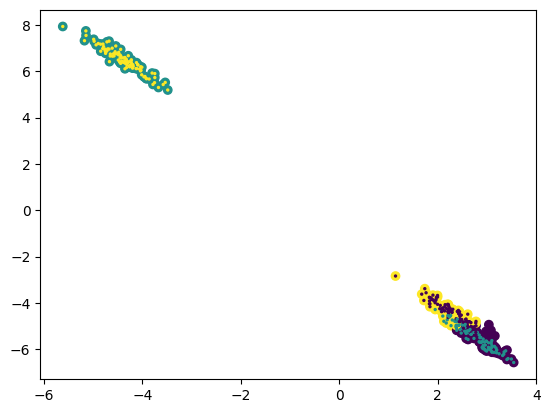

In [48]:
model = KMeans(n_clusters=3)
model.fit(x_an)
pred = model.labels_
df = pd.DataFrame(x_an)
df['label'] = y
df['kmeans'] = pred
print(df.groupby(['label'])['kmeans'].value_counts())
plt.scatter(x_an[:,0],x_an[:,1],c=pred)
plt.scatter(x_an[:,0],x_an[:,1],c=y,s=2)
plt.show()

label  gmm
0      0       95
       2        5
1      2       74
       0       26
2      1      100
Name: gmm, dtype: int64


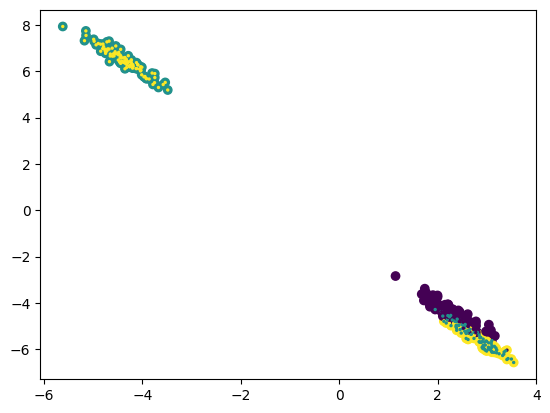

In [49]:
model = GaussianMixture(n_components=3)
model.fit(x_an)
pred = model.predict(x_an)
df = pd.DataFrame(x_an)
df['label'] = y
df['gmm'] = pred
print(df.groupby(['label'])['gmm'].value_counts())
plt.scatter(x_an[:,0],x_an[:,1],c=pred)
plt.scatter(x_an[:,0],x_an[:,1],c=y,s=2)
plt.show()